# Лабораторная работа 4. Подбор параметров и работа с данными

## Линейная регрессия

In [265]:
%pylab inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\bred7\anaconda3\envs\lab_3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [266]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [267]:
data = pd.read_csv('HousingData.csv')
data = data.dropna()
california_housing_target = data['MEDV']
california_housing_features = data.drop('MEDV', axis=1)

Разделим выборку на обучающую и тестовую в отношении 8/2:

In [268]:
x_train, x_test, y_train, y_test = train_test_split(california_housing_features, california_housing_target, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод `score`).

__Задание 2.__ Подбор гиперпараметров.

Для Lasso- и Ridge-регресий подберите коэффициент регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

In [269]:
log_grid = np.logspace(-6, 6, 100)

In [270]:
gridsearch_ridge = GridSearchCV(Ridge(), param_grid={'alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train, y_train)
best_alpha_ridge = gridsearch_ridge.best_params_['alpha']
best_alpha_ridge

0.12328467394420659

In [271]:
gridsearch_lasso = GridSearchCV(Lasso(), param_grid={'alpha': log_grid}, cv=5, scoring='r2')
gridsearch_lasso.fit(x_train, y_train)
best_alpha_lasso = gridsearch_lasso.best_params_['alpha']
best_alpha_lasso

0.007564633275546291

In [272]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
print('Linear regression train score: ', linear_regression_model.score(x_train, y_train))
print('Linear regression test score: ', linear_regression_model.score(x_test, y_test))
print("-------------------------------------------")
ridge_regression_model = Ridge()
ridge_regression_model.fit(x_train, y_train)
print('Ridge regression train score (default alpha): ', ridge_regression_model.score(x_train, y_train))
print('Ridge regression test score (default alpha): ', ridge_regression_model.score(x_test, y_test))
print("-------------------------------------------")
lasso_regression_model = Lasso()
lasso_regression_model.fit(x_train, y_train)
print('Lasso regression train score (default alpha): ', lasso_regression_model.score(x_train, y_train))
print('Lasso regression test score (default alpha): ', lasso_regression_model.score(x_test, y_test))
print("-------------------------------------------")
optimal_ridge = Ridge(alpha=best_alpha_ridge)
optimal_ridge.fit(x_train, y_train)
print('Ridge regression train score (optimal alpha): ', optimal_ridge.score(x_train, y_train))
print('Ridge regression test score (optimal alpha): ', optimal_ridge.score(x_test, y_test))
print("-------------------------------------------")
optimal_lasso = Lasso(alpha=best_alpha_lasso)
optimal_lasso.fit(x_train, y_train)
print('Lasso regression train score (optimal alpha): ', optimal_lasso.score(x_train, y_train))
print('Lasso regression test score (optimal alpha): ', optimal_lasso.score(x_test, y_test))

Linear regression train score:  0.7975984643516084
Linear regression test score:  0.6270849941673178
-------------------------------------------
Ridge regression train score (default alpha):  0.794783078767437
Ridge regression test score (default alpha):  0.6207024215900822
-------------------------------------------
Lasso regression train score (default alpha):  0.7384637087685073
Lasso regression test score (default alpha):  0.5428400662932409
-------------------------------------------
Ridge regression train score (optimal alpha):  0.7974578419733549
Ridge regression test score (optimal alpha):  0.6260548936319834
-------------------------------------------
Lasso regression train score (optimal alpha):  0.7973432530214153
Lasso regression test score (optimal alpha):  0.6250507421338833


Постройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

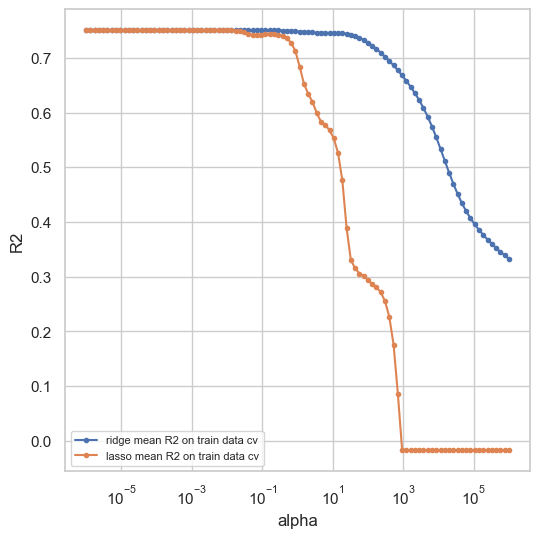

In [273]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(log_grid, gridsearch_ridge.cv_results_['mean_test_score'], marker='.')
plt.plot(log_grid, gridsearch_lasso.cv_results_['mean_test_score'], marker='.')
plt.legend(['ridge mean R2 on train data cv', 'lasso mean R2 on train data cv'], prop={'size': 8})
plt.show()

In [274]:
gridsearch_ridge = GridSearchCV(Ridge(), param_grid={'alpha': log_grid}, cv=5, scoring='r2').fit(x_test, y_test)
gridsearch_ridge.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2....
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])},
             scoring='r2')

In [275]:
gridsearch_lasso = GridSearchCV(Lasso(), param_grid={'alpha': log_grid}, cv=5, scoring='r2')
gridsearch_lasso.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2....
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])},
             scoring='r2')

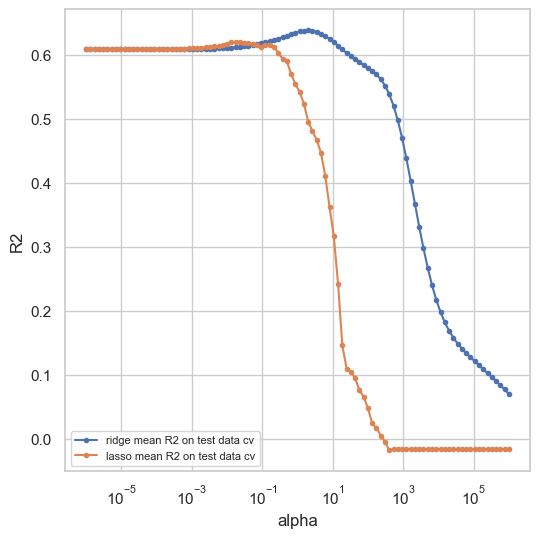

In [276]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(log_grid, gridsearch_ridge.cv_results_['mean_test_score'], marker='.')
plt.plot(log_grid, gridsearch_lasso.cv_results_['mean_test_score'], marker='.')
plt.legend(['ridge mean R2 on test data cv', 'lasso mean R2 on test data cv'], prop={'size': 8})
plt.show()

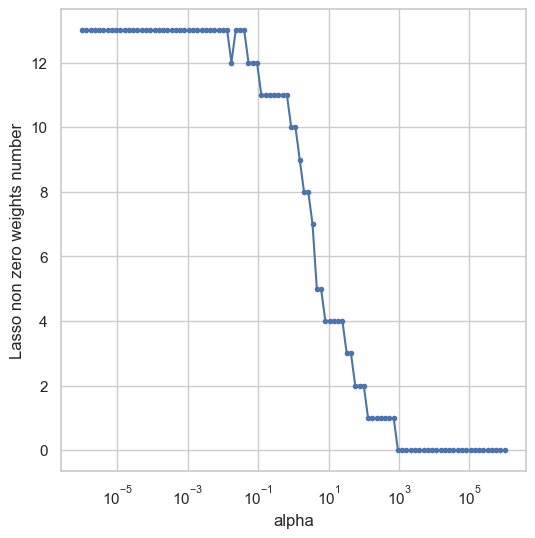

In [277]:
non_zero_weights = []
for a in log_grid:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    non_zero_weights.append(np.count_nonzero(lasso.coef_))

plt.figure(figsize=(6, 6))
plt.plot(log_grid, non_zero_weights, marker='.')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Lasso non zero weights number')
plt.show()

In [278]:
pd.DataFrame({'alpha': log_grid, 'lasso mean_test_score': gridsearch_lasso.cv_results_['mean_test_score'], 'ridge mean_test_score': gridsearch_ridge.cv_results_['mean_test_score']})

,alpha,lasso mean_test_score,ridge mean_test_score
0,0.000001,0.608923,0.608922
1,0.000001,0.608923,0.608922
2,0.000002,0.608924,0.608923
3,0.000002,0.608924,0.608923
4,0.000003,0.608925,0.608923
...,...,...,...
95,327454.916288,-0.015786,0.096571
96,432876.128108,-0.015786,0.090341
97,572236.765935,-0.015786,0.083961
98,756463.327555,-0.015786,0.077282


В какой момент происходит недообучение? Почему?

__Ответ__: при alpha > 0.1 точность lasso регрессии начинает стремительно падать, и при alpha > 10 практически уходит в ноль. Точность ridge регрессии начинает падать при alpha > 1000.

Это происходит потому что bias в какой-то момент становится слишком большим, а левое слагаемое в функции ошибки становится значительно меньше (-> 0), в итоге мы начнём минимизировать только правое слагаемое путём уменьшения весов всё сильнее и сильнее (в результате достигая 0), что в итоге и приводит к недообучению

Именно поэтому график ошибки и график количества ненулевых весов у lasso регрессии так похожи

![Alt text](lasso.png "a title")
![Alt text](ridge.png "a title")

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Масштабирование.

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить масштабирование к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после масштабирования. Изменилось ли оно? Предположите, почему так могло произойти.

In [279]:
pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
gridsearch_ridge = GridSearchCV(pipeline, param_grid={'ridge__alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train, y_train)
best_alpha_standard_scaler = gridsearch_ridge.best_params_['ridge__alpha']

In [280]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('ridge', Ridge())])
gridsearch_ridge = GridSearchCV(pipeline, param_grid={'ridge__alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train, y_train)
best_alpha_min_max_scaler = gridsearch_ridge.best_params_['ridge__alpha']
print('Best alpha before scaling: ', best_alpha_ridge)
print('Best alpha after standard scaling: ', best_alpha_standard_scaler)
print('Best alpha after min max scaling: ', best_alpha_min_max_scaler)

Best alpha before scaling:  0.12328467394420659
Best alpha after standard scaling:  14.174741629268048
Best alpha after min max scaling:  0.49770235643321137


__Ответ:__ Да, изменилось, потому что изменились веса признаков, и, соответственно, изменился bias при одинаковом alpha

__Задание 4.__ Новые признаки.

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так, чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

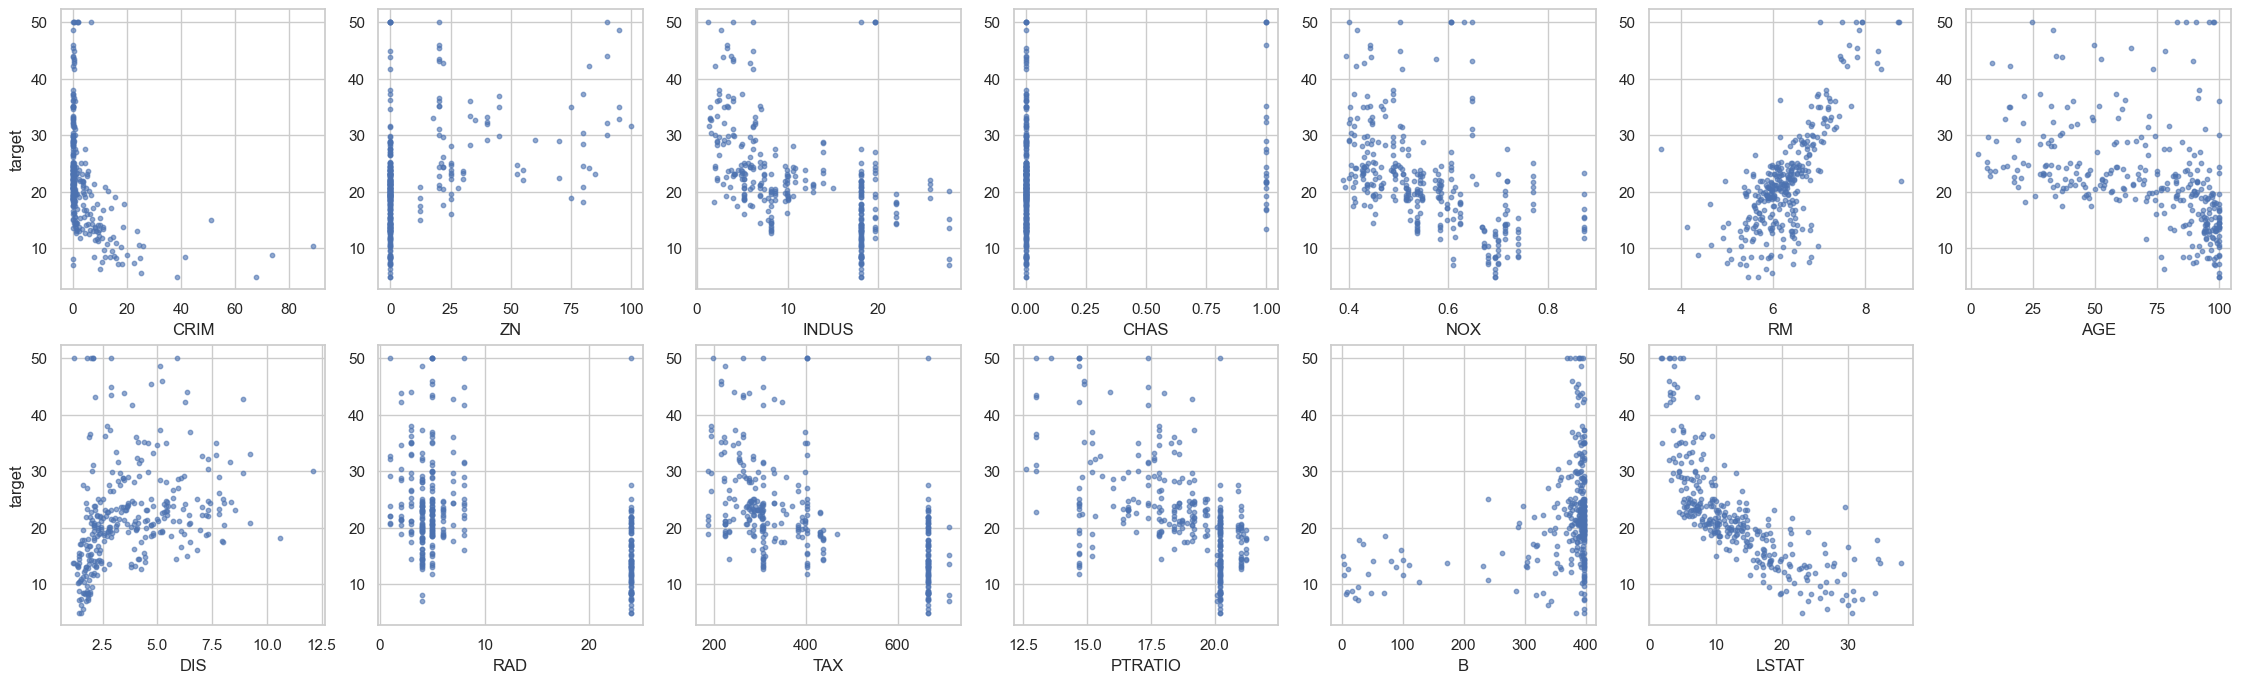

In [281]:
pairplot(x_train, y_train)

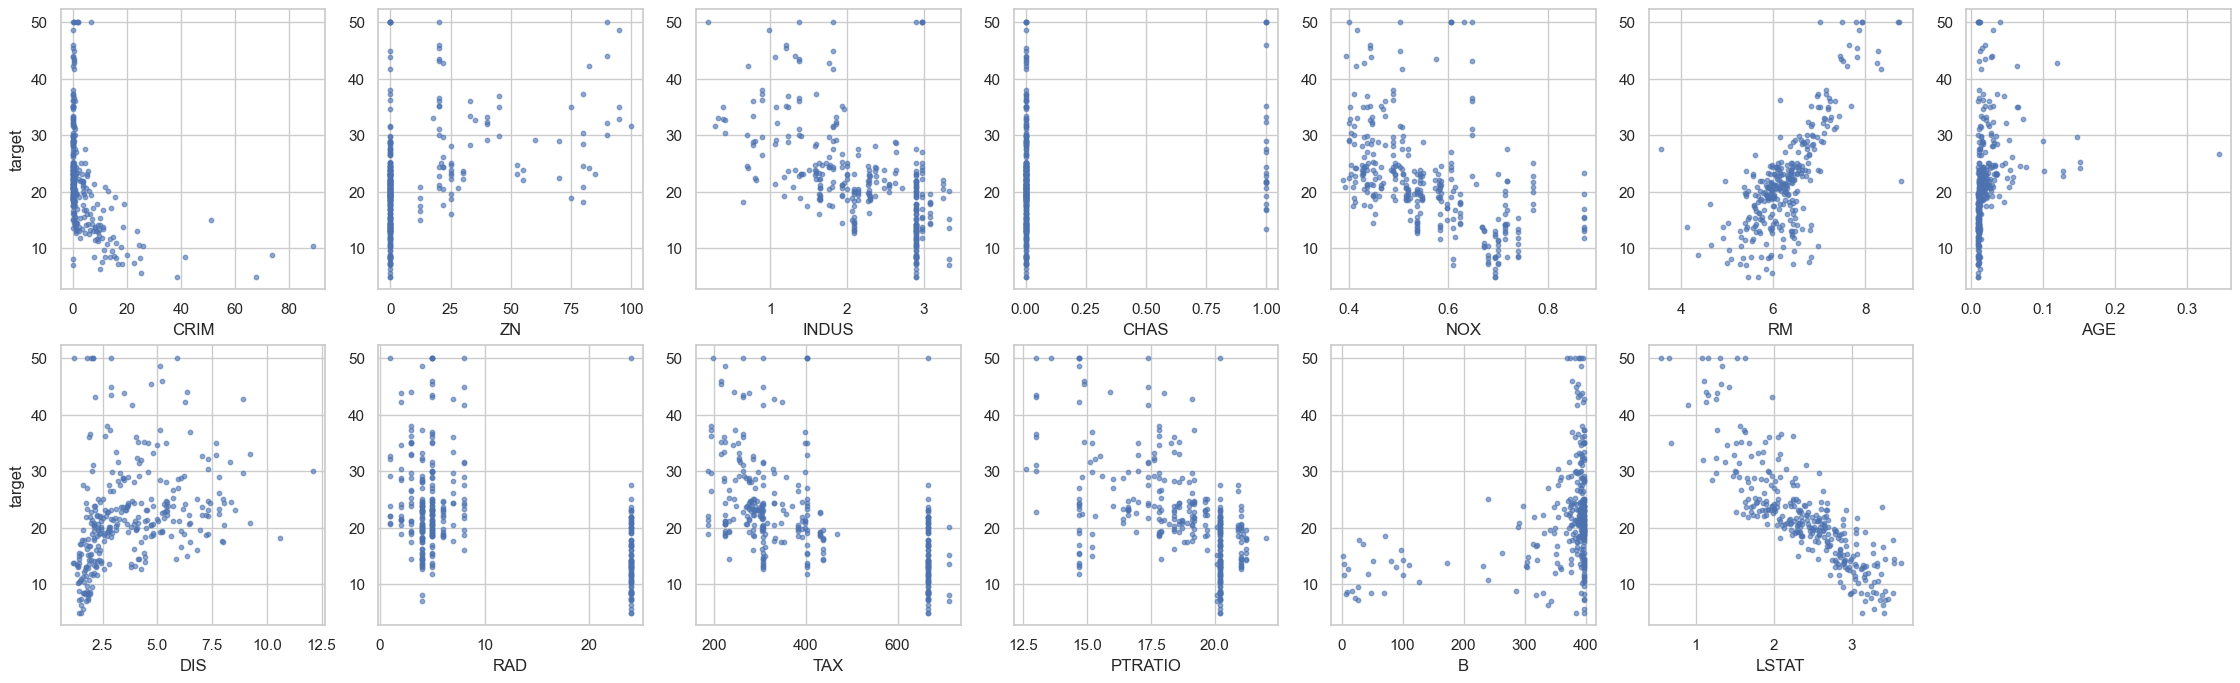

In [282]:
x_train_new_features = x_train.copy()
x_train_new_features['AGE'] = 1 / (x_train_new_features['AGE'])
x_train_new_features['LSTAT'] = np.log(x_train_new_features['LSTAT'])
x_train_new_features['INDUS'] = np.log(x_train_new_features['INDUS'])

x_test_new_features = x_test.copy()
x_test_new_features['AGE'] = 1 / (x_test_new_features['AGE'])
x_test_new_features['LSTAT'] = np.log(x_test_new_features['LSTAT'])
x_test_new_features['INDUS'] = np.log(x_test_new_features['INDUS'])

pairplot(x_train_new_features, y_train)

In [283]:
gridsearch_ridge = GridSearchCV(Ridge(), param_grid={'alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train_new_features, y_train)
best_alpha_ridge = gridsearch_ridge.best_params_['alpha']
best_alpha_ridge

0.21544346900318867

In [284]:
ridge_regression_model = Ridge(best_alpha_ridge)
ridge_regression_model.fit(x_train_new_features, y_train)
print('Ridge regression test score: ', ridge_regression_model.score(x_test_new_features, y_test))

Ridge regression test score:  0.6380720511901877


Помимо преобразований отдельных признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures, чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [285]:
from sklearn.preprocessing import PolynomialFeatures

In [286]:
poly = PolynomialFeatures(2)
x_train_poly_features = np.array(poly.fit_transform(x_train_new_features))
x_test_poly_features = np.array(poly.fit_transform(x_test_new_features))

gridsearch_ridge = GridSearchCV(Ridge(), param_grid={'alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train_poly_features, y_train)

best_alpha = gridsearch_ridge.best_params_['alpha']
print('Best alpha: ', best_alpha)

ridge_regression_model = Ridge(best_alpha)
ridge_regression_model.fit(x_train_poly_features, y_train)
print('Ridge regression test score with optimal alpha and k = 2: ', ridge_regression_model.score(x_test_poly_features, y_test))

C:\Users\bred7\anaconda3\envs\lab_3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01809e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\bred7\anaconda3\envs\lab_3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.78723e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\bred7\anaconda3\envs\lab_3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.8208e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\bred7\anaconda3\envs\lab_3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00686e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\bred7\anaconda3\envs\lab

Best alpha:  305.38555088334124
Ridge regression test score with optimal alpha and k = 2:  0.7395524355780361


__Задание 5.__ Оптимальная архитектура, анализ.

При помощи `Pipeline` и `GridSearchCV` выберите оптимальную архитектуру, комбинируя различные методы масштабирования, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимизация сошлась.

In [287]:
methods_stats_df = pd.DataFrame(data=None, columns=['method', 'r2', 'poly_degree', 'alpha'])
methods_stats_df_index = 0

def append_to_methods_stats_df(method_name, r2, poly_degree, a):
    global methods_stats_df_index
    methods_stats_df.loc[methods_stats_df_index] = [method_name, r2, poly_degree, a]
    methods_stats_df_index += 1

In [288]:
pipeline = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('ridge', Ridge())])

gridsearch_ridge = GridSearchCV(pipeline, param_grid={'poly__degree': range(1, 5), 'ridge__alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train_new_features, y_train)

append_to_methods_stats_df('StandardScaler + PolynomialFeatures + Ridge', gridsearch_ridge.cv_results_['mean_test_score'].max(), gridsearch_ridge.best_params_['poly__degree'], gridsearch_ridge.best_params_['ridge__alpha'])

In [289]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()), ('ridge', Ridge())])

gridsearch_ridge = GridSearchCV(pipeline, param_grid={'poly__degree': range(1, 5), 'ridge__alpha': log_grid}, cv=5, scoring='r2')
gridsearch_ridge.fit(x_train_new_features, y_train)

append_to_methods_stats_df('MinMaxScaler + PolynomialFeatures + Ridge', gridsearch_ridge.cv_results_['mean_test_score'].max(), gridsearch_ridge.best_params_['poly__degree'], gridsearch_ridge.best_params_['ridge__alpha'])

In [290]:
pipeline = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('lasso', Lasso())])

gridsearch_lasso = GridSearchCV(pipeline,
                                param_grid={'poly__degree': range(1, 5),
                                            'lasso__alpha': log_grid,
                                            'lasso__tol': [0.1],
                                            'lasso__max_iter': [30000]},
                                cv=5,
                                scoring='r2')
gridsearch_lasso.fit(x_train_new_features, y_train)

append_to_methods_stats_df('StandardScaler + PolynomialFeatures + Lasso', gridsearch_lasso.cv_results_['mean_test_score'].max(), gridsearch_lasso.best_params_['poly__degree'], gridsearch_lasso.best_params_['lasso__alpha'])

In [291]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()), ('lasso', Lasso())])

gridsearch_lasso = GridSearchCV(pipeline,
                                param_grid={'poly__degree': range(1, 5),
                                            'lasso__alpha': log_grid,
                                            'lasso__tol': [0.1],
                                            'lasso__max_iter': [30000]},
                                cv=5,
                                scoring='r2')
gridsearch_lasso.fit(x_train_new_features, y_train)

append_to_methods_stats_df('MinMaxScaler + PolynomialFeatures + Lasso', gridsearch_lasso.cv_results_['mean_test_score'].max(), gridsearch_lasso.best_params_['poly__degree'], gridsearch_lasso.best_params_['lasso__alpha'])


Для одной комбинаций метода масштабирования и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [292]:
methods_stats_df

,method,r2,poly_degree,alpha
0,StandardScaler + PolynomialFeatures + Ridge,0.856242,2,43.287613
1,MinMaxScaler + PolynomialFeatures + Ridge,0.868419,2,0.284804
2,StandardScaler + PolynomialFeatures + Lasso,0.831652,2,0.215443
3,MinMaxScaler + PolynomialFeatures + Lasso,0.853070,2,0.017475


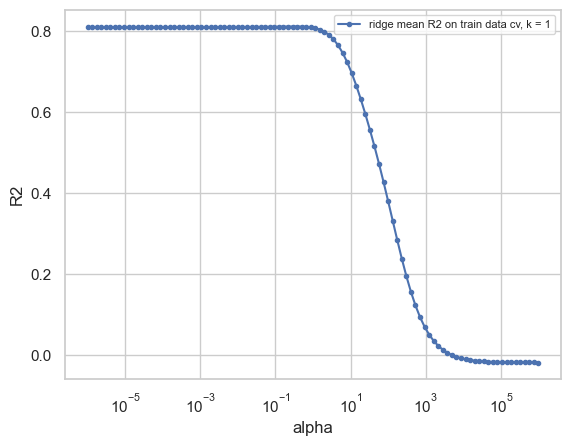

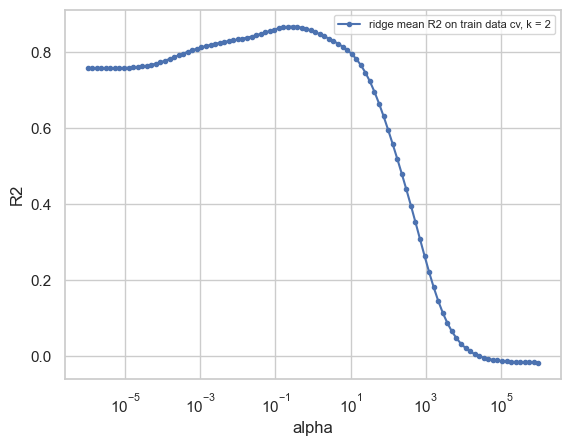

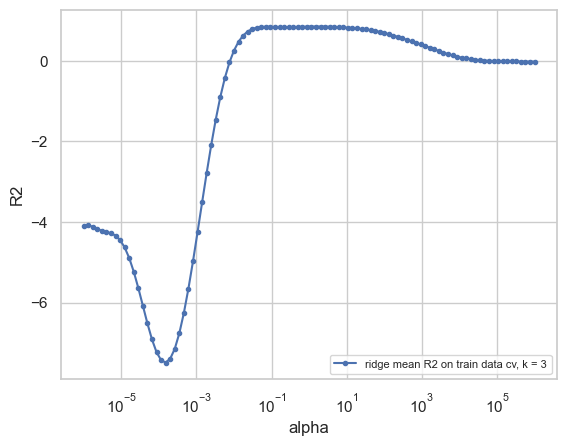

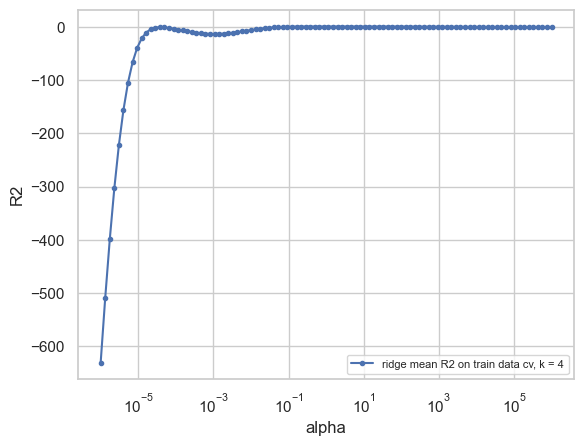

In [293]:
k = 4
different_k_indexes = np.split(np.arange(len(gridsearch_ridge.cv_results_['param_poly__degree'].data)), k)
for i in range(k):
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('R2')
    plt.plot(log_grid, gridsearch_ridge.cv_results_['mean_test_score'][different_k_indexes[i]], marker='.')
    plt.legend([f'ridge mean R2 on train data cv, k = {i+1}'], prop={'size': 8})
    plt.show()

In [294]:
gridsearch_ridge.score(x_test_new_features, y_test)

0.7216557830738763

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__